In [34]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import cv2
import matplotlib.pyplot as plt
import matplotlib

In [35]:
df = pd.read_csv('EVS7.csv', sep=',')
# print(list(df))
# print(df)
QOI = ['Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q57', 'Q71', 'Q106', 'Q107', 'Q108']

/Users/thecydonian/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Potential Questions of Interest:
* A124_02- Neighbours: People of a different race
* A124_06- Neighbours: Immigrants/foreign workers
* C002- Jobs scarce: Employers should give priority to (nation) people than immigrants (3-point scale)
* C002_01- Jobs scarce: Employers should give priority to (nation) people than immigrants (5-point scale)
* G007_35_B- Trust: People of another religion (B)
* G007_36_B- Trust: People of another nationality (B)
* G005- Citizen of country
* G052- Evaluate the impact of immigrants on the development of [your country]

### Proxies for Conspiracy
* E033- Self positioning in political scale
* E069_06- Confidence: The Police
* E069_07- Confidence: Parliament
* E069_08- Confidence: The Civil Services
* E069_11- Confidence: The Government
* E069_17- Confidence: Justice System/Courts

---
## Select Relevant Questions and Normalize

In [36]:
subdf = df[['A001', 'A002', 'A003', 'A004', 'A005', 'A006', 'A008', 'A009', 'A170', 'A173', 'A027', 'A029', 'A030', 'A032', 'A034', 'A035', 'A038', 'A039', 'A040', 'A041', 'A042', 'A065', 'A066', 'A067', 'A068', 'A071', 'A072', 'A074', 'A078', 'A079', 'A080_01', 'A080_02', 'A124_02', 'A124_03', 'A124_06', 'A124_08', 'A124_09', 'A165', 'B008', 'C001', 'C001_01', 'C002', 'C002_01', 'D081', 'D026_03', 'D026_05', 'C038', 'C039', 'C041', 'D001_B', 'G007_18_B', 'G007_33_B', 'G007_34_B', 'G007_35_B', 'G007_36_B', 'D054', 'D059', 'D060', 'D061', 'D078', 'E001', 'E002', 'E003', 'E004', 'Y002', 'E012', 'E015', 'E018', 'E023', 'E025', 'E026', 'E027', 'E028', 'E033', 'E035', 'E036', 'E037', 'E039', 'E069_01', 'E069_02', 'E069_04', 'E069_05', 'E069_06', 'E069_07', 'E069_08', 'E069_18A', 'E069_18', 'E069_11', 'E069_12', 'E069_13', 'E069_14', 'E069_17', 'E069_20', 'E111_01', 'E114', 'E115', 'E116', 'E117', 'E179_WVS7', 'E181_EVS5', 'E224', 'E225', 'E226', 'E227', 'E228', 'E229', 'E233', 'E233A', 'E233B', 'E235', 'E236', 'E263', 'E264', 'E265_01', 'E265_02', 'E265_03', 'E265_04', 'E265_05', 'E265_06', 'E265_07', 'E265_08', 'F025', 'F028', 'F028B_WVS7', 'F066_EVS5', 'F034', 'F050', 'F051', 'F053', 'F054', 'F063', 'F114A', 'F115', 'F116', 'F117', 'F118', 'F119', 'F120', 'F121', 'F122', 'F123', 'F132', 'E290', 'F144_02', 'G005', 'G006', 'G052', 'G062', 'G063', 'G255', 'G256', 'G257', 'H009', 'H010', 'H011', 'X001', 'X002', 'X003', 'X003R', 'X003R2', 'G027A', 'X002_02A', 'V002', 'V002A', 'V001', 'V001A', 'X007', 'x026_01', 'X011', 'X013', 'X025A_01', 'X025R', 'W002A_01', 'W002R', 'V004AM_01', 'V004RM', 'V004AF_01', 'V004RF']]

subdf = subdf.dropna().apply(pd.to_numeric)

subdf[subdf < 0] = np.nan

norm=(subdf-subdf.min())/(subdf.max()-subdf.min())

norm = norm.fillna(norm.mean())

with_countries = df[['cntry_AN']].join(norm)

---
### Country Rank Method:

In [37]:
def country_rank(q, a=False):
    conf_by_country = with_countries[['cntry_AN', q]]

    conf_by_country = conf_by_country.groupby(['cntry_AN']).mean()


    sortedconf = conf_by_country.sort_values(by=[q], ascending=a)
    print(sortedconf[:10])
    print('')
    
    print(f"Denmark: {np.where(sortedconf.index == 'DK')[0][0]}")
    print(f"Norway: {np.where(sortedconf.index == 'NO')[0][0]}")
    print(f"Sweden: {np.where(sortedconf.index == 'SE')[0][0]}")
    print(f"Finland: {np.where(sortedconf.index == 'FI')[0][0]}")
    print(f"Total Countries Responded: {len(sortedconf)}")

---
## Investigating Respect for Authority

In [38]:
country_rank('E018', a=True)

              E018
cntry_AN          
NG        0.050458
EC        0.062455
BO        0.067826
PT        0.077940
NI        0.082083
PR        0.084789
CO        0.086184
VN        0.086250
ZW        0.087358
JO        0.088576

Denmark: 46
Norway: 76
Sweden: 74
Finland: 73
Total Countries Responded: 81


Norway, Sweden, and Finland in top 10 for respect for authority

---
## Investigating Confidence in Government

In [39]:
conf_by_country = with_countries[['cntry_AN', 'E069_11']]

conf_by_country = conf_by_country.groupby(['cntry_AN']).mean()


sortedconf = conf_by_country.sort_values(by=['E069_11'], ascending=True)
print(sortedconf[:10])

           E069_11
cntry_AN          
CN        0.188088
TJ        0.196181
AZ        0.235365
VN        0.240259
ID        0.286269
PH        0.294444
MM        0.299444
BD        0.299673
SG        0.332937
KZ        0.375654


No Scandinavian Countries in top 10 for confidence in government

In [40]:
print(f"Denmark: {np.where(sortedconf.index == 'DK')[0][0]}")
print(f"Norway: {np.where(sortedconf.index == 'NO')[0][0]}")
print(f"Sweden: {np.where(sortedconf.index == 'SE')[0][0]}")
print(f"Finland: {np.where(sortedconf.index == 'FI')[0][0]}")
print(f"Total Countries Responded: {len(sortedconf)}")

Denmark: 36
Norway: 15
Sweden: 21
Finland: 32
Total Countries Responded: 81


### Investigating Why:

In [41]:
from sklearn.linear_model import LinearRegression

y = norm['E069_11']
X = norm.drop('E069_11', 1)

reg = LinearRegression().fit(X, y)
reg.score(X, y)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(reg.coef_), columns=['Coefficients'])], axis = 1)
coefficients = coefficients.sort_values(by=['Coefficients'], ascending=False, key=abs)

print(coefficients[:20])

/var/folders/93/1_dtm0m93q54rqjqy65jg_s80000gn/T/ipykernel_6888/4213033405.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = norm.drop('E069_11', 1)


             0  Coefficients
83     E069_07      0.277443
87     E069_12      0.245299
92     E111_01     -0.131304
90     E069_17      0.130217
84     E069_08      0.080328
82     E069_06      0.051510
109       E236     -0.038764
143       G005      0.033660
173  V004AM_01      0.029146
155       X002     -0.027424
156       X003      0.027162
160   X002_02A      0.027091
79     E069_02      0.026488
150       G257      0.025667
88     E069_13      0.024081
45     D026_05      0.023564
43        D081     -0.022570
164      V001A     -0.022275
112    E265_01      0.020917
157      X003R     -0.020675


In [42]:
from sklearn import datasets, linear_model
import statsmodels.api as sma

In [43]:
_1  = sma.OLS(y, X)
_2  = _1.fit()

# print(_2.summary())

# print(_2.pvalues)

#convert each Series to a DataFrame
coefs = _2.params.to_frame(name='coef')
pvalues = _2.pvalues.to_frame(name='pvalue')

#concatenate three Series into one DataFrame
resultsdf = pd.concat([coefs, pvalues], axis=1)

resultsdf = resultsdf.sort_values(by=['coef'], ascending=False, key=abs)

print(resultsdf[:40])

               coef         pvalue
E069_07    0.277850   0.000000e+00
E069_12    0.245642   0.000000e+00
E111_01   -0.130904   0.000000e+00
E069_17    0.129991   0.000000e+00
X003       0.128201   1.392528e-21
E069_08    0.080432  4.793728e-194
X002       0.074387   4.488447e-16
E069_06    0.051693   6.517361e-99
E236      -0.038333   9.877262e-50
G005       0.036516   5.672341e-27
V004AM_01  0.030374   6.735751e-05
E069_02    0.026483   5.299607e-31
G257       0.025754   2.900246e-19
X002_02A   0.025725   1.232614e-01
E069_13    0.024085   3.265727e-22
D026_05    0.023795   4.138072e-23
V001A     -0.022731   1.343870e-01
D081      -0.021890   2.569100e-23
E265_01    0.021027   1.399559e-20
X003R     -0.020007   1.302267e-02
E233B     -0.018347   5.121603e-19
E069_14    0.017903   6.622048e-14
E235       0.017795   1.334560e-10
E026      -0.017724   2.175476e-15
H010       0.017178   8.379820e-15
E114       0.017157   1.271324e-20
E227       0.017082   3.498734e-13
F063      -0.017013 

Confidence in Parliment
Confidence in Political Parties
Satisfaction with the Political System
Confidence in Justice System
Age Recorded? + (older less trust)
Confidence in the Civil Services
\\\
Confidence in The Police
Democraticness in Own Country - (more democratic more trust)
Citizen of Country + (not citizen less trust)
Highest Education Level of Mother + (more education less trust)
Confidence in Armed Forces
How close do you feel to your country
\\\
Confidence in Major Countries
Child must care for sick parent
\\\
Homosexual couples make equally good parents
Confidence in fair counting of votes
Age Recorded

higher = less trust

In [49]:
x_desc = {"A124_02": ("Neighbours: People of a different race", 1),
"A124_06": ("Neighbours: Immigrants/foreign workers", 1),
"C002_01": ("Jobs scarce: Employers should give priority to (nation) people than immigrants (5-point scale)", -1),
"G007_35_B": ("Trust: People of another religion (B)", -1),
"G007_36_B": ("Trust: People of another nationality (B)", -1),
"G005": ("Citizen of country", 1),
"G052": ("Evaluate the impact of immigrants on the development of [your country]", 1)}

y_desc = {"E033": ("Self positioning in political scale", 1),
"E069_06": ("Confidence: The Police", -1),
"E069_07": ("Confidence: Parliament", -1),
"E069_08": ("Confidence: The Civil Services", -1),
"E069_11": ("Confidence: The Government", -1),
"E069_17": ("Confidence: Justice System/Courts", -1)}

In [50]:
def predict_value(x_cols, y_col):
    y = norm[y_col]
    X = norm[x_cols]
    
    _1  = sma.OLS(y, X)
    _2  = _1.fit()

    # print(_2.summary())

    # print(_2.pvalues)

    #convert each Series to a DataFrame
    coefs = _2.params.to_frame(name='coef')
    pvalues = _2.pvalues.to_frame(name='pvalue')

    #concatenate three Series into one DataFrame
    resultsdf = pd.concat([coefs, pvalues], axis=1)

    resultsdf = resultsdf.sort_values(by=['coef'], ascending=False, key=abs)

    print(resultsdf)

In [53]:
def predict_values(x_cols, y_cols):
    for y_col in y_cols:
        print(f'predicting: "{y_desc[y_col][0]}"')
        predict_value(x_cols, y_col)
        print('')

In [54]:
predict_values(["A124_02", "A124_06", "C002_01", "G007_35_B", "G007_36_B", "G005", "G052"], 
               ["E033", "E069_06", "E069_07", "E069_08", "E069_11", "E069_17"])

predicting: "Self positioning in political scale"
               coef         pvalue
G005       0.359814   0.000000e+00
G007_36_B  0.105546  7.686085e-210
G052       0.094289   0.000000e+00
G007_35_B  0.063517   2.003938e-74
A124_06    0.026044   3.086311e-45
A124_02    0.019866   9.429521e-22
C002_01    0.005160   2.171302e-02

predicting: "Confidence: The Police"
               coef         pvalue
G005       0.254566   0.000000e+00
G007_36_B  0.144647  4.035522e-255
G007_35_B  0.117785  1.867547e-163
G052       0.043113   4.456402e-44
C002_01    0.039545   1.469040e-45
A124_02   -0.012324   1.669769e-06
A124_06    0.005304   2.054069e-02

predicting: "Confidence: Parliament"
               coef         pvalue
G005       0.454030   0.000000e+00
G007_36_B  0.147143  6.815584e-250
G007_35_B  0.108074  1.047760e-130
C002_01    0.058930   1.194060e-93
A124_02   -0.039112   1.910907e-49
A124_06   -0.001632   4.880786e-01
G052       0.000407   8.982532e-01

predicting: "Confidence: The Civi

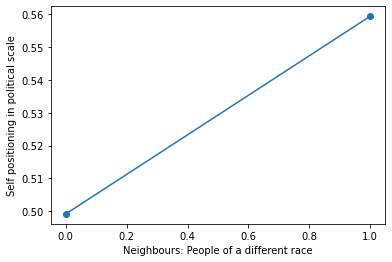

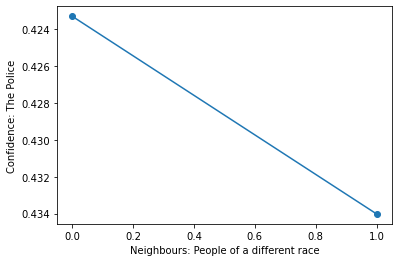

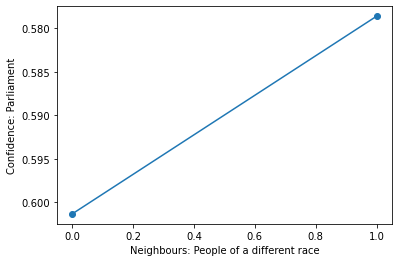

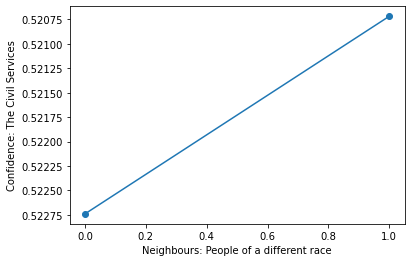

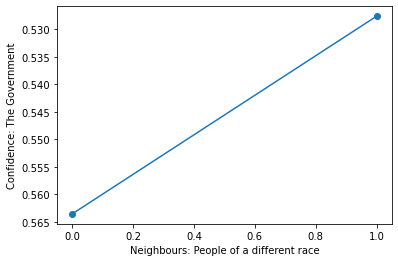

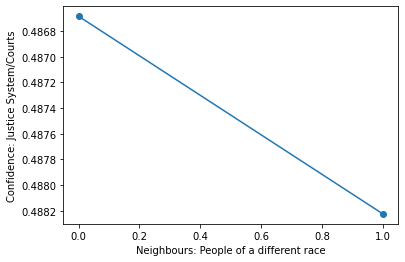

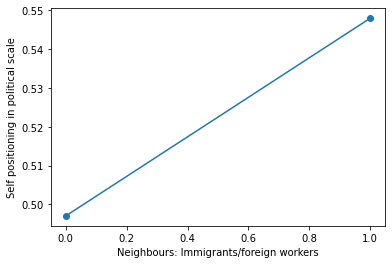

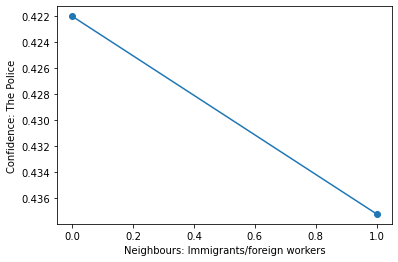

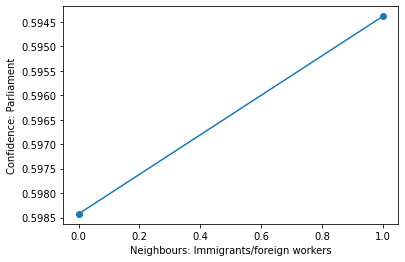

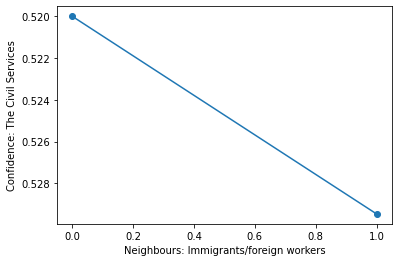

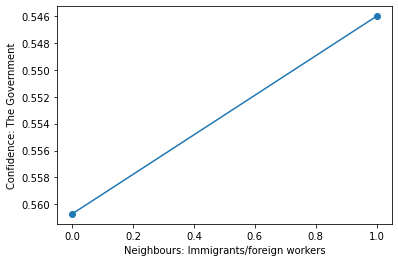

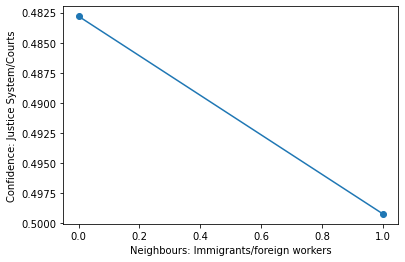

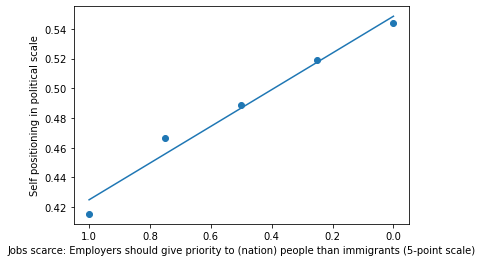

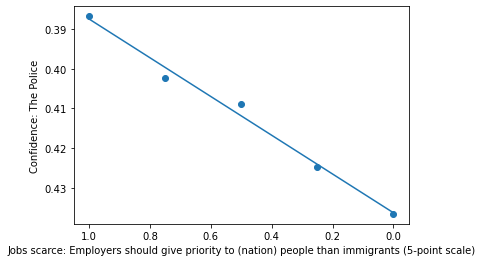

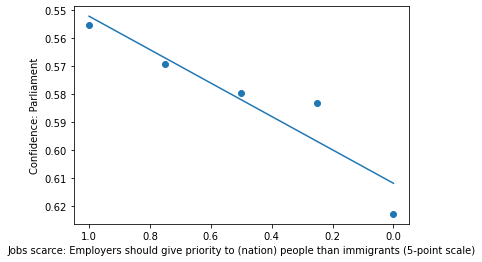

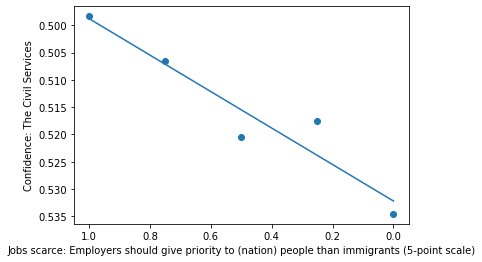

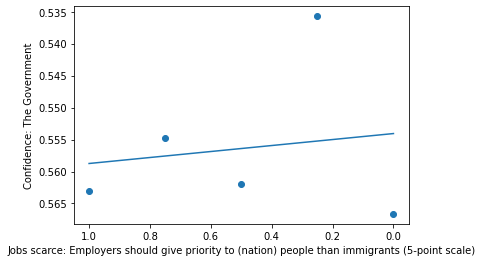

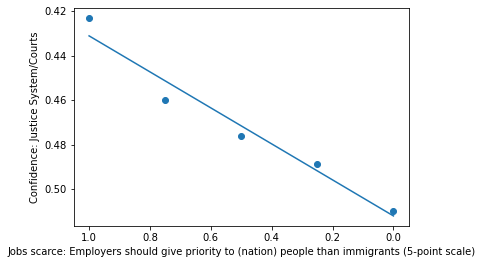

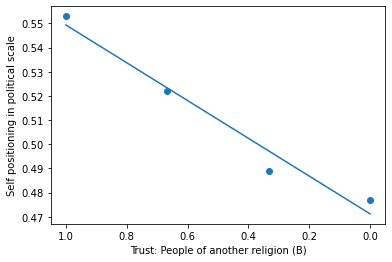

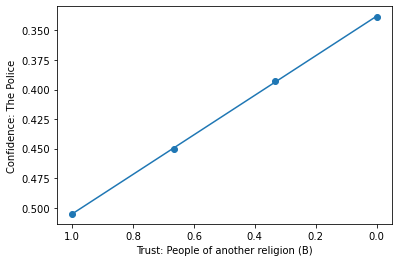

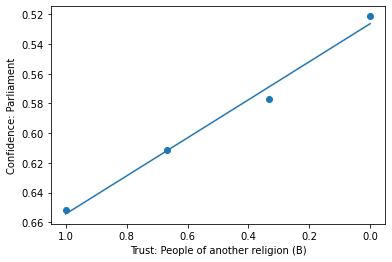

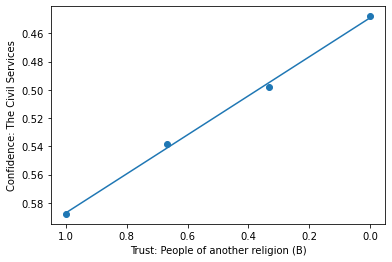

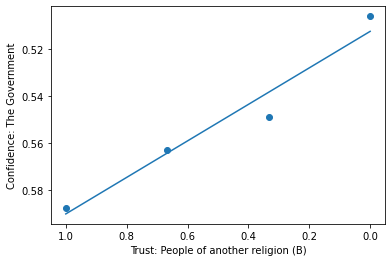

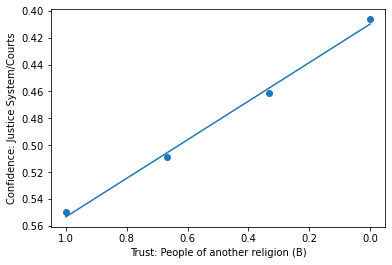

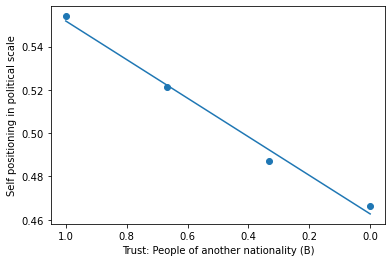

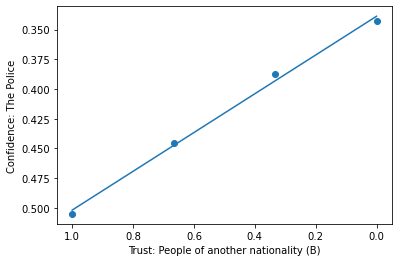

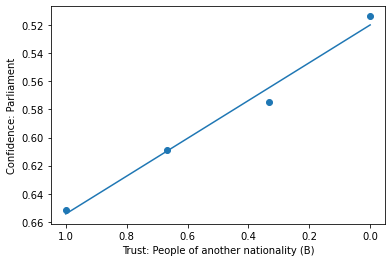

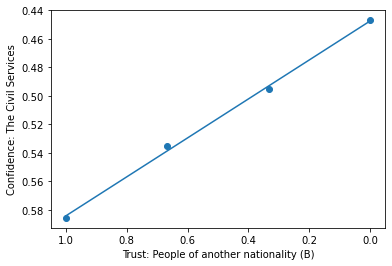

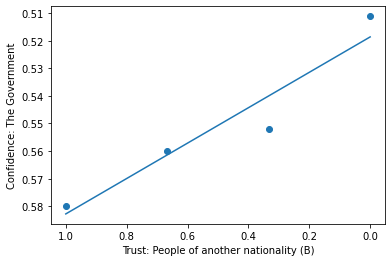

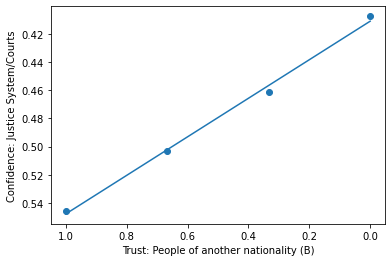

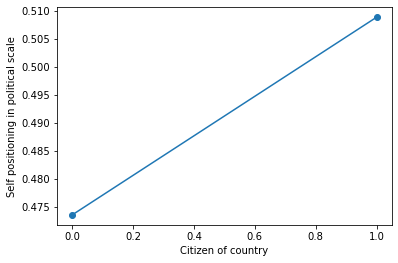

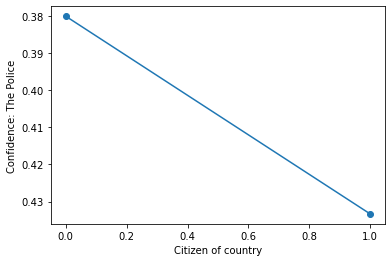

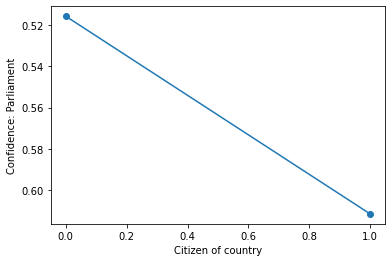

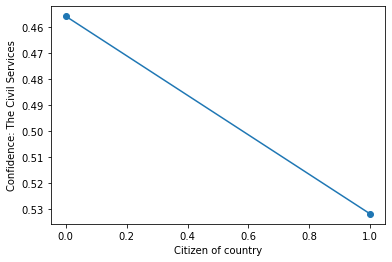

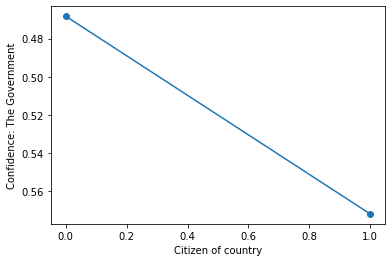

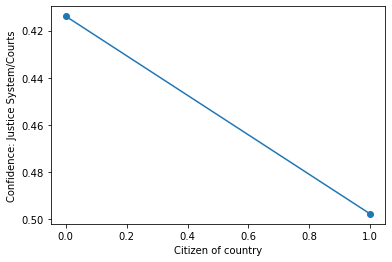

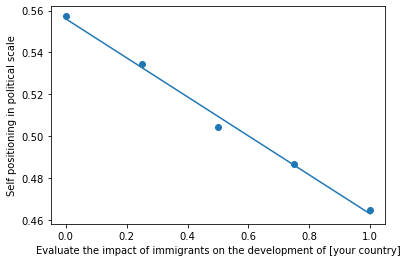

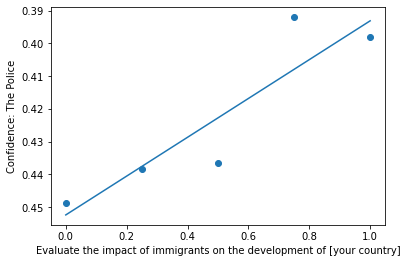

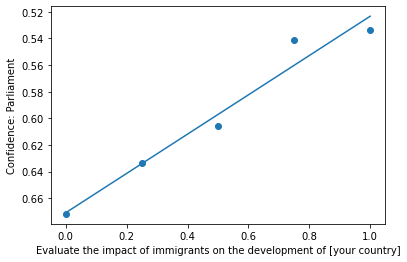

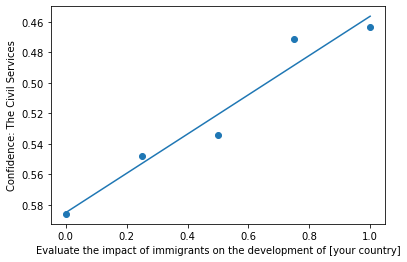

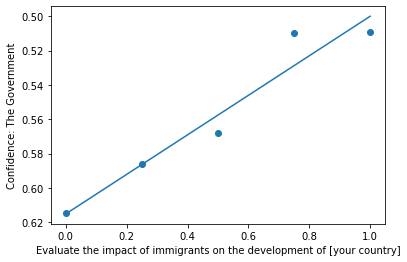

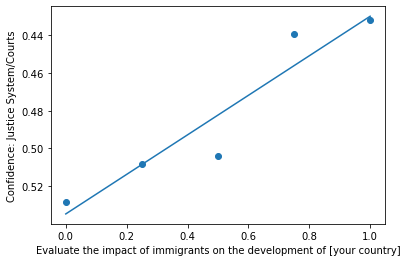

In [57]:
def plot_rel(xcol, ycol, best_fit=True):
    
    sdf = subdf[[xcol, ycol]]
    norm=(sdf-sdf.min())/(sdf.max()-sdf.min())

    ybyx = norm.groupby([xcol]).mean()
    # print(ybyx)

    y = ybyx[ycol]
    if y_desc[ycol][1] == -1:
        plt.gca().invert_yaxis()
    
    X = ybyx.index.values
    if x_desc[xcol][1] == -1:
        plt.gca().invert_xaxis()

    plt.scatter(X, y)
    plt.xlabel(x_desc[xcol][0])
    plt.ylabel(y_desc[ycol][0])
    
    if best_fit:
        plt.plot(X, np.poly1d(np.polyfit(X, y, 1))(X))

    plt.show()

for x in ["A124_02", "A124_06","C002_01", "G007_35_B", "G007_36_B", "G005", "G052"]:
    for y in ["E033", "E069_06", "E069_07", "E069_08", "E069_11", "E069_17"]:
        plot_rel(x, y)